<a href="https://colab.research.google.com/github/gracjans/GSN/blob/main/Gracjan_Strzelec_239580_GSN_1_zima_2021_22_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Część 1 - zapoznanie się ze środowiskiem Google Colab

#### <u>Zadania</u>


1.   Wybierz odpowiednie środowisko wykonawcze dla obliczeń z akceleracją graficzną

2.   Sprawdź jaki model akceleratora graficznego został ci przydzielony 



In [ ]:
!nvidia-smi

Sun Oct 17 16:31:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

3. Sprawdź czy zainstalowano biblioteki numpy, opencv, tensorflow, pytorch

In [ ]:
!pip show numpy
!echo "----------------------"
!pip show opencv-python
!echo "----------------------"
!pip show tensorflow
!echo "----------------------"
!pip show torch
!echo "----------------------"

Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-finance, fbprophet, fastprog

4. Wczytaj zbiór danych MNIST wbudowany w bibliotekę keras (https://keras.io/api/datasets/), sprawdź rozmiary zbiorów: treningowego i testowego

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


5. Podłącz swój Dysk Google do środowiska Colab. Zapisz na swoim dysku zbiór treningowy w postaci macierzy numpy (plik .npy lub .npz) a także losowo wybrany obraz w formacie .jpg lub .png korzystając z biblioteki OpenCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
np.save('drive/MyDrive/train.npy', x_train)

In [ ]:
import cv2
cv2.imwrite('drive/MyDrive/example.jpg', x_train[0, :, :])

True

6. Wczytaj ze swojego Dysku Google zapisany zbiór treningowy oraz obraz, sprawdź ich spójność z danymi sprzed zapisu

In [ ]:
x_train_loaded = np.load('drive/MyDrive/train.npy')

In [ ]:
assert np.array_equal(x_train, x_train_loaded)

In [ ]:
img = np.array(cv2.imread('drive/MyDrive/example.jpg'))

In [ ]:
assert np.array_equal(x_train[0, :, :], img)

AssertionError: ignored

In [ ]:
### Jak łatwo się wkopać
print(x_train[0, :, :].shape)
print(img.shape)

In [ ]:
# po przegrzebaniu dokumentacji dodajemy flagę, https://docs.opencv.org/master/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80
img = np.array(cv2.imread('drive/MyDrive/example.jpg', cv2.IMREAD_UNCHANGED))

In [ ]:
### Jak łatwo się wkopać jeszcze głębiej
print(x_train[0, :, :].shape)
print(img.shape)

print(x_train[0, :, :][0, :])
print(img[0, :])

(28, 28)
(28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 1 0 0 1 1 0 0 0 0 0 3 0 0 0 2 0 0 0 1 1 1 0 0 0 0 0]


In [ ]:
### PNG na pierwszy rzut oka nie pomaga
cv2.imwrite('drive/MyDrive/example.png', x_train[0, :, :])
img = np.array(cv2.imread('drive/MyDrive/example.png'))

In [ ]:
assert np.array_equal(x_train[0, :, :], img)

AssertionError: ignored

In [ ]:
print(x_train[0, :, :].shape)
print(img.shape)

(28, 28)
(28, 28, 3)


In [ ]:
### Jak to zrobić właściwie
img = np.array(cv2.imread('drive/MyDrive/example.png', cv2.IMREAD_UNCHANGED))

In [ ]:
assert np.array_equal(x_train[0, :, :], img)

In [ ]:
print(x_train[0, :, :].shape)
print(img.shape)

print(x_train[0, :, :][0, :])
print(img[0, :])

(28, 28)
(28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
cv2.imwrite('drive/MyDrive/example.tif', x_train[0, :, :])
img_tif = np.array(cv2.imread('drive/MyDrive/example.tif', cv2.IMREAD_UNCHANGED))
assert np.array_equal(x_train[0, :, :], img_tif)

#OpenCV quickstart/reminder

In [ ]:

# Download the test image
!wget --no-check-certificate \
    http://www.lenna.org/len_std.jpg \
    -O lena.jpg


# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-10-25 21:02:31--  http://www.lenna.org/len_std.jpg
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20401 (20K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  19.92K   106KB/s    in 0.2s    

2021-10-25 21:02:33 (106 KB/s) - ‘lena.jpg’ saved [20401/20401]



In [ ]:
#open the image
input_image=cv2.imread('lena.jpg')

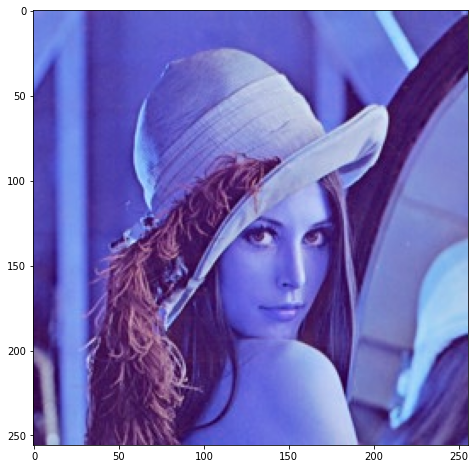

In [ ]:
#show the image using matplotlib
plt.imshow(input_image)

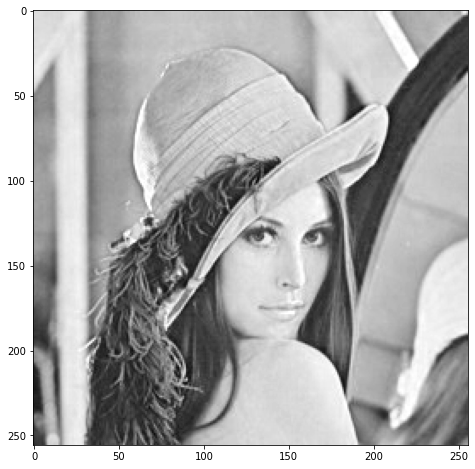

In [ ]:
#What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels
plt.imshow(r, cmap='gray')


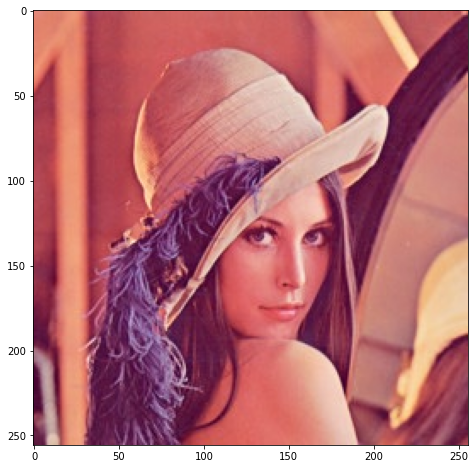

In [ ]:
# We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done.

In [ ]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print((COLORflags))

# If you want to see them all, rather than just a count uncomment the following line
#print(COLORflags)

['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_CIVIDIS', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_INFERNO', 'COLORMAP_JET', 'COLORMAP_MAGMA', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_PLASMA', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_TURBO', 'COLORMAP_TWILIGHT', 'COLORMAP_TWILIGHT_SHIFTED', 'COLORMAP_VIRIDIS', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_B

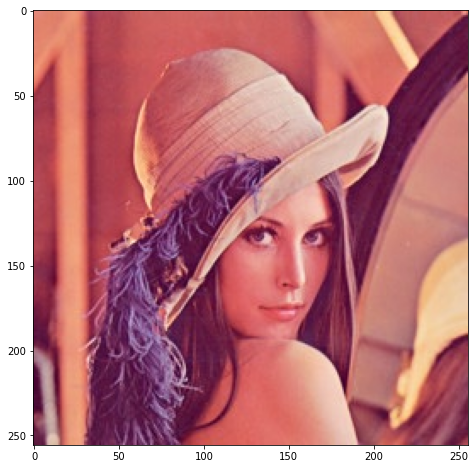

In [ ]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)


Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [ ]:
pixel = input_image[100,100]
print(pixel)

[ 81  43 119]


In [ ]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on.

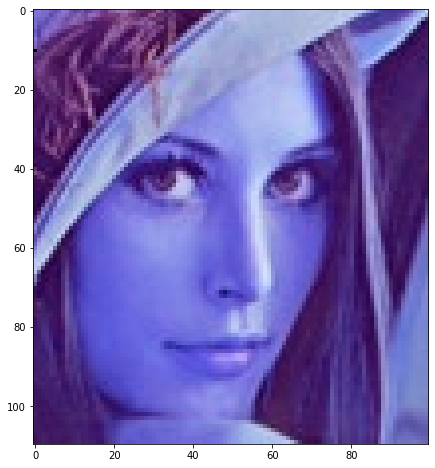

In [ ]:
face = input_image[90:200, 100:200]
plt.imshow(face)

In OpenCV python style, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing].

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as 
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

In [ ]:
hsvim=cv2.cvtColor(freshim2,cv2.COLOR_BGR2HSV)
bcrop =hsvim[90:200, 100:200, 1]
plt.imshow(bcrop, cmap="gray")

NameError: ignored

## **Task 1** - draw three R, G and B rectangles on the image using slicing

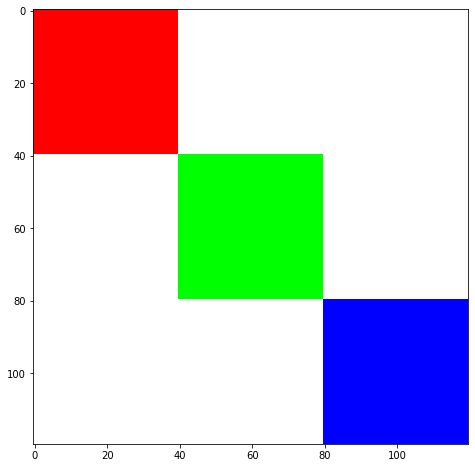

In [ ]:
# initialize image
task1_img = np.zeros((120,120,3), np.uint8)
# make every pixel of an image white
task1_img.fill(255)

task1_img[:40,:40,1:] = 0           # red rectangle
task1_img[40:80,40:80,(0,2)] = 0    # green rectangle
task1_img[80:,80:,:2] = 0           # blue rectangle

plt.imshow(task1_img)

# Basics of image manipulation

Rotate, flip...



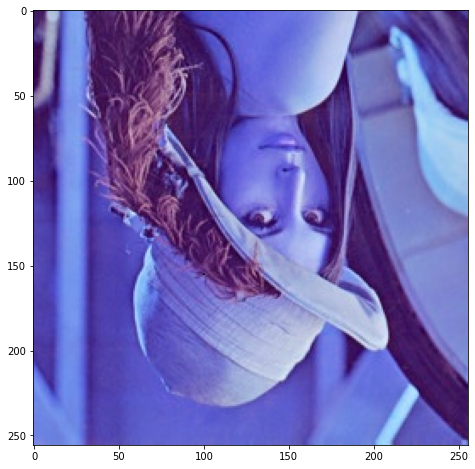

In [ ]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

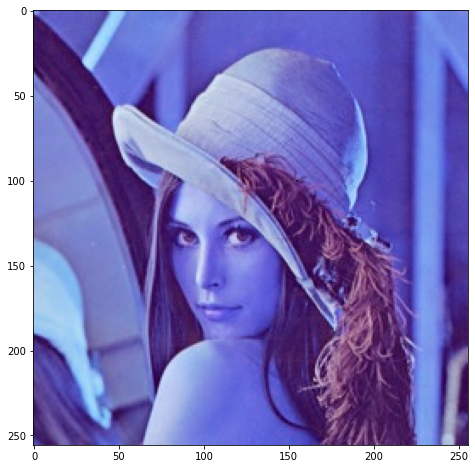

In [ ]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

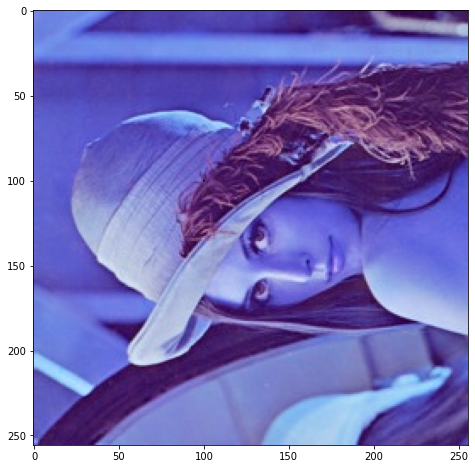

In [ ]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

Minimum, maximum
To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately.

In [ ]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

min 0.0 is at (100, 100), and max 225.0 is at (207, 60)
min 0.0 is at (255, 34), and max 235.0 is at (207, 60)
min 0.0 is at (100, 100), and max 255.0 is at (206, 0)


##Arithmetic operations on images
OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size.

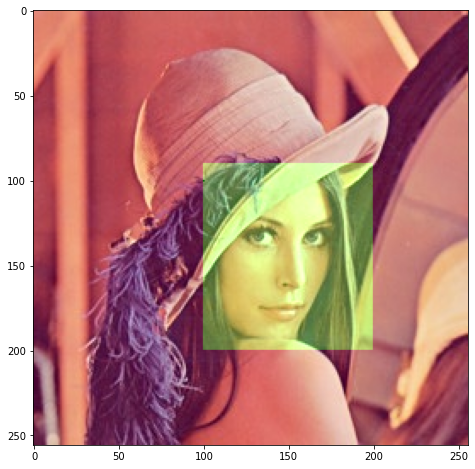

In [ ]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[90:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

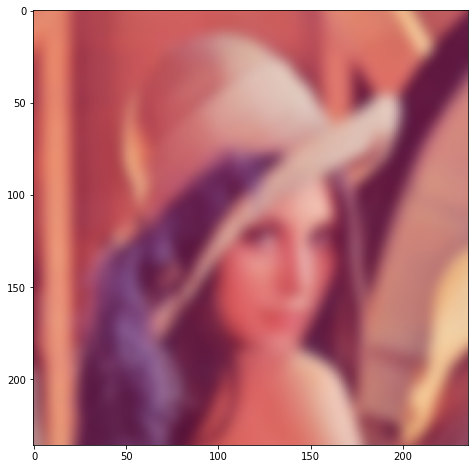

In [ ]:
d=10 # blur amount - check how it will affect the result
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

#Edges

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by convolution, and indeed convolutional neural networks are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs here.

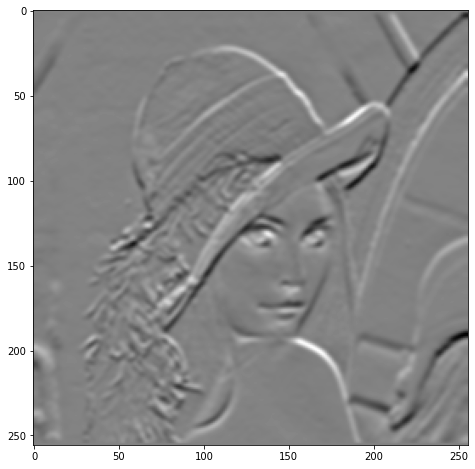

In [ ]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobely,cmap = 'gray') 
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference

Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

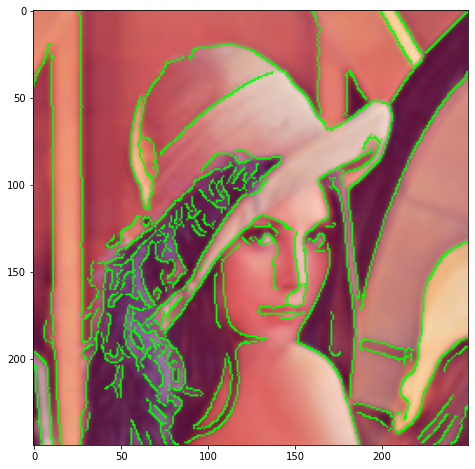

In [ ]:
th1=30
th2=90 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

# Detection



In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    http://www.lenna.org/len_std.jpg \
    -O lena.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml

# these imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-10-25 21:02:42--  http://www.lenna.org/len_std.jpg
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20401 (20K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  19.92K   106KB/s    in 0.2s    

2021-10-25 21:02:43 (106 KB/s) - ‘lena.jpg’ saved [20401/20401]

--2021-10-25 21:02:43--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.

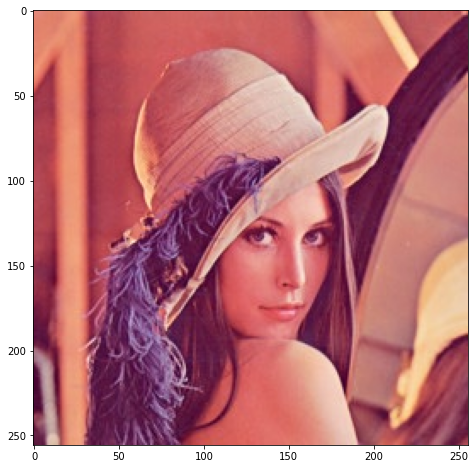

In [ ]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('lena.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

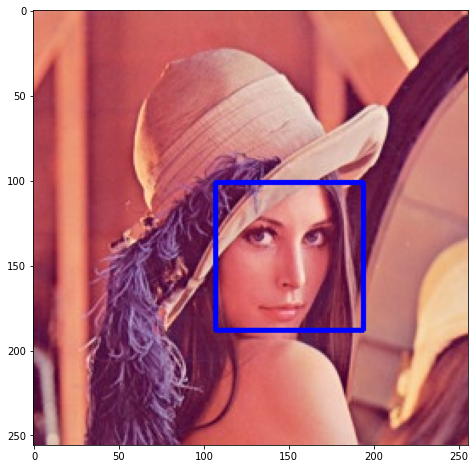

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('lena.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

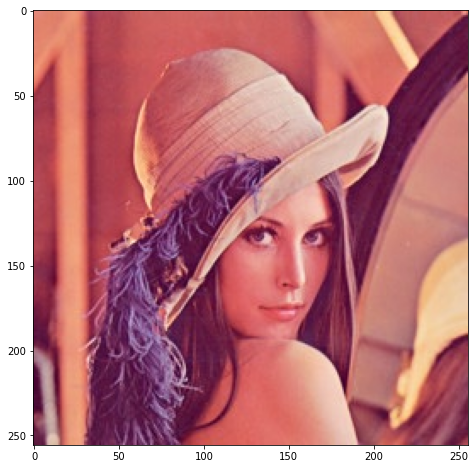

In [ ]:
# this is a pre-trained smile cascade
test_image = cv2.imread('lena.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.5, 22)

for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

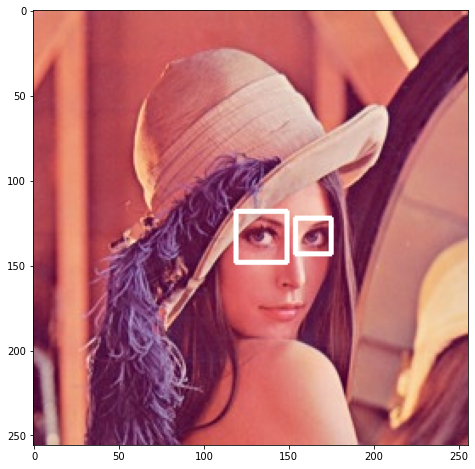

In [ ]:
# eye detection
test_image = cv2.imread('lena.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.2, 3)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

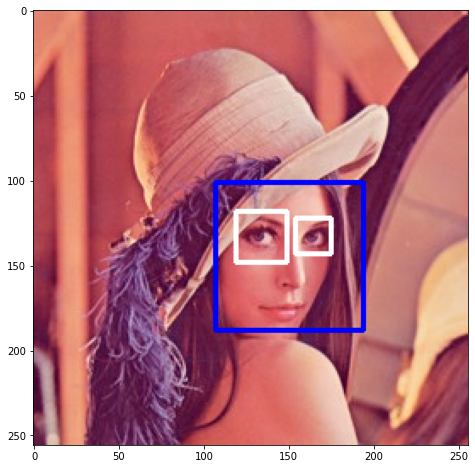

In [ ]:
#combine the results and filter using the information about all the elements
test_image = cv2.imread('lena.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## **Task 2** - Find a different image, containing multiple (preferably smiling) people and test the detectors (suggestion - search in stock images)

--2021-10-25 21:02:47--  https://img3.stockfresh.com/files/k/kurhan/m/73/670694_stock-photo-business-people-team.jpg
Resolving img3.stockfresh.com (img3.stockfresh.com)... 84.17.37.209
Connecting to img3.stockfresh.com (img3.stockfresh.com)|84.17.37.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73985 (72K) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]  72.25K  --.-KB/s    in 0.03s   

2021-10-25 21:02:47 (2.72 MB/s) - ‘people.jpg’ saved [73985/73985]



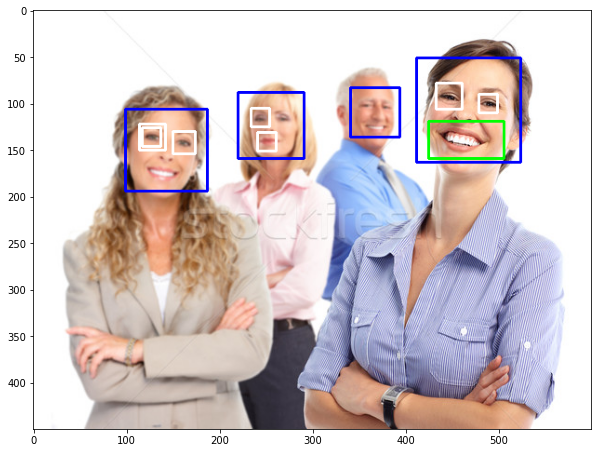

In [ ]:
!wget --no-check-certificate \
    https://img3.stockfresh.com/files/k/kurhan/m/73/670694_stock-photo-business-people-team.jpg \
    -O people.jpg

people_image = cv2.imread('people.jpg')
people_grey = cv2.cvtColor(people_image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(people_grey, 1.3, 5)

smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(people_grey, 1.5, 22)

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(people_grey, 1.4, 2)


for (x,y,w,h) in faces:
  cv2.rectangle(people_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(people_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(people_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(people_image, cv2.COLOR_BGR2RGB))

# Built-in datasets introduction and generators

In [ ]:
# main imports
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data as load_data_MNIST
from tensorflow.keras.datasets.fashion_mnist import load_data as load_data_Fashion_MNIST
from tensorflow.keras.datasets.cifar100 import load_data as load_data_CIFAR_100
from tensorflow.keras.datasets.cifar10 import load_data as load_data_CIFAR_10

import numpy as np


import cv2

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

First dataset - using simple spiral data with N classes and M samples

In [ ]:
!pip install nnfs

In [ ]:
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()
N = 3
M = 100

X, y = spiral_data(samples=M, classes=N)


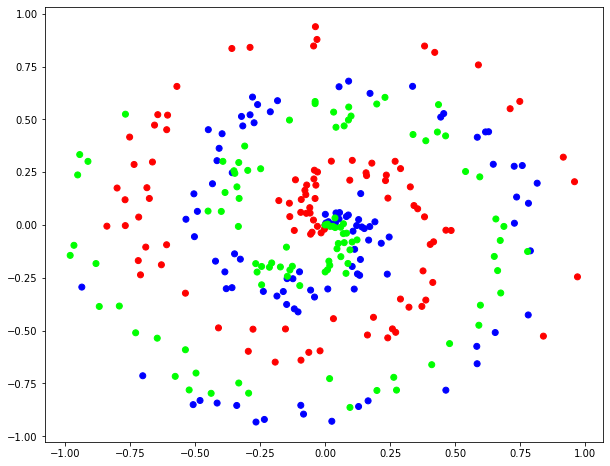

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

##2D images - Greyscale
MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data_MNIST()

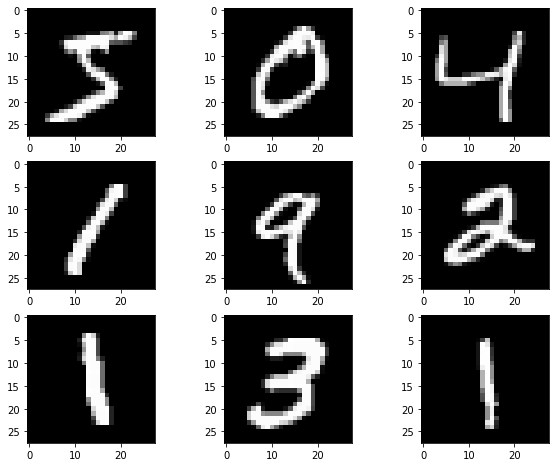

In [ ]:
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## 2D images - Grayscale MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data_Fashion_MNIST()

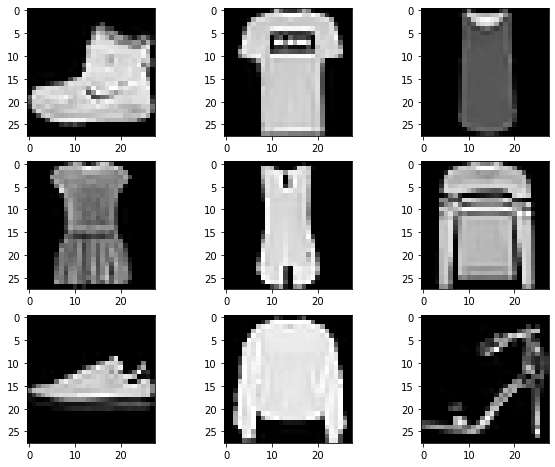

In [ ]:
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

##2D images - color

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data_CIFAR_10()


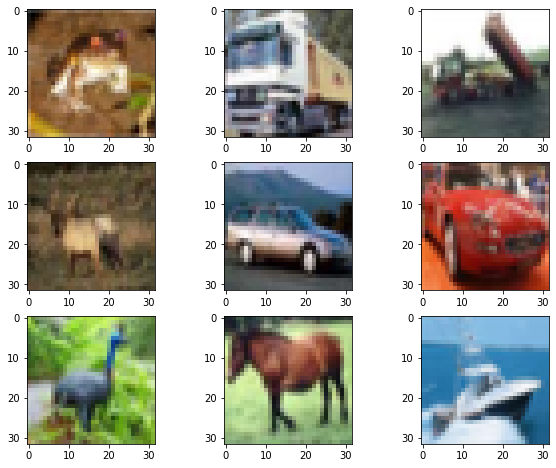

In [ ]:
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data_CIFAR_100(label_mode="fine")

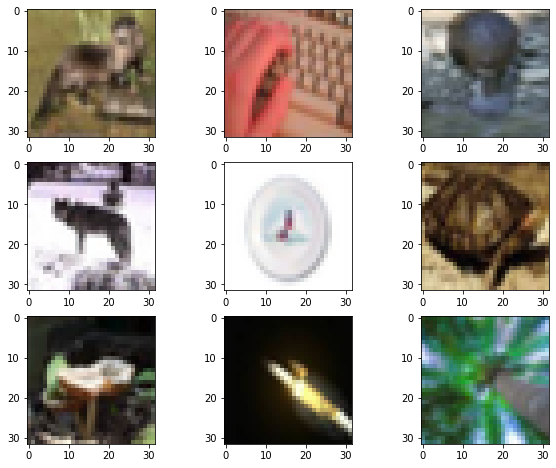

In [ ]:
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i+ 100])
plt.show()

##Generated Shapes - Greyscale

In [ ]:
# generate empty image
width = 16
height = 16
canvas = np.zeros((height, width), dtype = "uint8")
thickness = 2


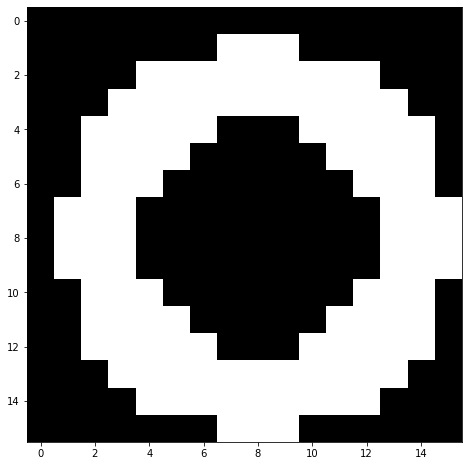

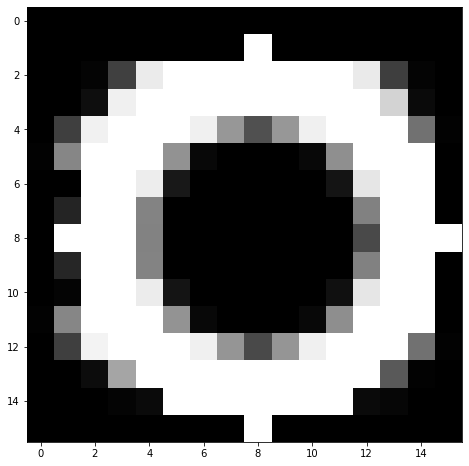

In [ ]:
# Circle
circle = cv2.circle(canvas.copy(), (width//2, height//2), radius=(width//2) - thickness, color=(255), thickness=thickness)
circle2 = cv2.circle(canvas.copy(), (width//2, height//2), radius=(width//2 - thickness), color=(255), thickness=thickness, lineType = cv2.LINE_AA)

plt.imshow(circle, cmap='gray')
plt.show()

plt.imshow(circle2, cmap='gray')
plt.show()

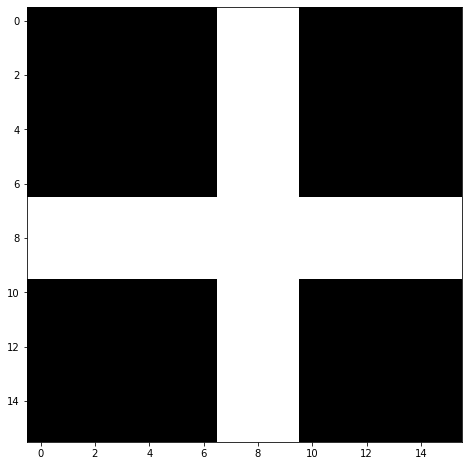

In [ ]:
# Crossbar

crossbar = cv2.line(canvas.copy(), (width//2, 0), (width//2, height), color=(255), thickness=thickness)
crossbar = cv2.line(crossbar, (0, height//2), (width, height//2), color=(255), thickness=thickness)

plt.imshow(crossbar, cmap='gray')
plt.show()


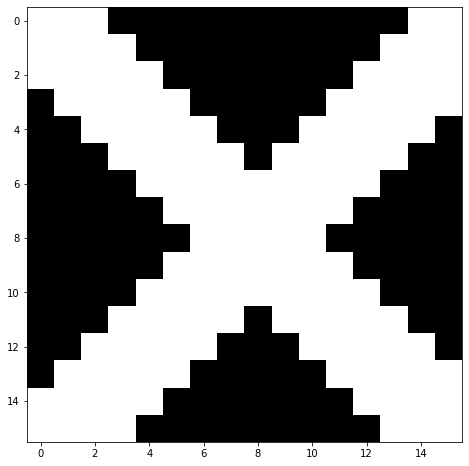

In [ ]:
# Cross

cross = cv2.line(canvas.copy(), (0, 0), (width, height), color=(255), thickness=thickness)
cross = cv2.line(cross, (width, 0), (0, height), color=(255), thickness=thickness)

plt.imshow(cross, cmap='gray')
plt.show()

## **Task 3:**

Create functions to generate a dataset of shapes on images with size 32x32 (black background), where the shapes of size 16x16 (white foreground) are randomly placed on the images. 




In [ ]:
# functions for generating shapes
def generate_circle(canvas, width, height, radius=6):
  return cv2.circle(canvas.copy(), (width, height), radius=radius, color=(255, 255, 255), thickness=2) 

def generate_cross(canvas, left, right, top, bottom):
  crossbar = cv2.line(canvas.copy(), left, right, color=(255, 255, 255), thickness=2)
  return cv2.line(crossbar, top, bottom, color=(255, 255, 255), thickness=2)

In [ ]:
def generate_shapes_dataset():
  from sklearn.utils import shuffle
  canvas_32 = np.zeros((32, 32), dtype = "uint8")

  X = []
  y = []

  # generate set of circles
  for w in range(7,25):
    for h in range(7,25):
      X.append(generate_circle(canvas_32.copy(), w, h))
      y.append(0)

  # generate set of crossbars
  for w in range(0,17):
    for h in range(0,17):
      X.append(generate_cross(canvas_32.copy(), (0+w,8+h), (16+w,8+h), (8+w,0+h), (8+w,16+h)))
      y.append(1)

  # generate set of crosses
  for w in range(0,17):
    for h in range(0,17):
      X.append(generate_cross(canvas_32.copy(), (0+w,0+h), (16+w,16+h), (0+w,16+h), (16+w,0+h)))
      y.append(2)

  X_shuffled, y_shuffled = shuffle(X, y)
  # stack - join list of arrays along a new axis
  X = np.stack(X_shuffled)
  y = np.stack(y_shuffled)

  data = (X, y)
  return data

(902, 32, 32)
(902,)
2
1
0


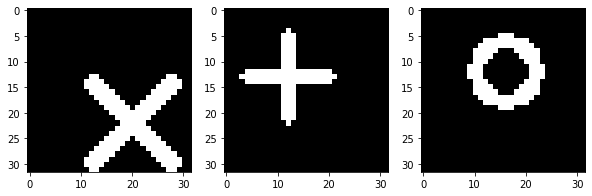

In [ ]:
# generate and preview dataset
X, y = generate_shapes_dataset()
print(X.shape)
print(y.shape)

print(y[0])
print(y[1])
print(y[2])

fig, axs = plt.subplots(1,3)
axs[0].imshow(X[0], cmap='gray')
axs[1].imshow(X[1], cmap='gray')
axs[2].imshow(X[2], cmap='gray')

## **Task 4:**

Create functions to generate a dataset of shapes, on images with size 32x32, with background of different colors as well as images

In [ ]:
def generate_shapes_with_background_dataset(backgrounds):
  import random
  from sklearn.utils import shuffle

  resized_backgrounds = []
  for bg in backgrounds:
    resized_backgrounds.append(cv2.resize(bg, (32,32))) 

  X = []
  y = []

  # generate set of circles
  for w in range(7,25):
    for h in range(7,25):
      X.append(generate_circle(resized_backgrounds[random.randrange(0,3)].copy(), w, h))
      y.append(0)

  # generate set of crossbars
  for w in range(0,17):
    for h in range(0,17):
      X.append(generate_cross(resized_backgrounds[random.randrange(0,3)].copy(), (0+w,8+h), (16+w,8+h), (8+w,0+h), (8+w,16+h)))
      y.append(1)

  # generate set of crosses
  for w in range(0,17):
    for h in range(0,17):
      X.append(generate_cross(resized_backgrounds[random.randrange(0,3)].copy(), (0+w,0+h), (16+w,16+h), (0+w,16+h), (16+w,0+h)))
      y.append(2)

  X_shuffled, y_shuffled = shuffle(X, y)
  # stack - join list of arrays along a new axis
  X = np.stack(X_shuffled)
  y = np.stack(y_shuffled)

  data = (X, y)
  return data

In [ ]:
# prepare background images
!wget --no-check-certificate \
    https://c4.wallpaperflare.com/wallpaper/1021/131/727/colors-texture-pattern-artwork-wallpaper-preview.jpg \
    -O colors_artwork_background.jpg

!wget --no-check-certificate \
    https://ia902807.us.archive.org/33/items/background-cover-buku-warna-hijau-12/__ia_thumb.jpg \
    -O green.jpg

!wget --no-check-certificate \
    https://www.commentnation.com/hotlinks/red_on_black_matte_pattern.jpg \
    -O dark.jpg

background_image1 = cv2.imread('colors_artwork_background.jpg')
background_image2 = cv2.imread('green.jpg')
background_image3 = cv2.imread('dark.jpg')

backgroud_images = (background_image1, background_image2, background_image3)

--2021-10-25 21:05:48--  https://c4.wallpaperflare.com/wallpaper/1021/131/727/colors-texture-pattern-artwork-wallpaper-preview.jpg
Resolving c4.wallpaperflare.com (c4.wallpaperflare.com)... 172.67.129.81, 104.21.2.147, 2606:4700:3033::6815:293, ...
Connecting to c4.wallpaperflare.com (c4.wallpaperflare.com)|172.67.129.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134293 (131K) [image/jpeg]
Saving to: ‘colors_artwork_background.jpg’

colors_artwork_back 100%[===================>] 131.15K  --.-KB/s    in 0.08s   

2021-10-25 21:05:48 (1.69 MB/s) - ‘colors_artwork_background.jpg’ saved [134293/134293]

--2021-10-25 21:05:48--  https://ia902807.us.archive.org/33/items/background-cover-buku-warna-hijau-12/__ia_thumb.jpg
Resolving ia902807.us.archive.org (ia902807.us.archive.org)... 207.241.232.107
Connecting to ia902807.us.archive.org (ia902807.us.archive.org)|207.241.232.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5221 (5.1K)

(902, 32, 32, 3)
(902,)
1
2
0


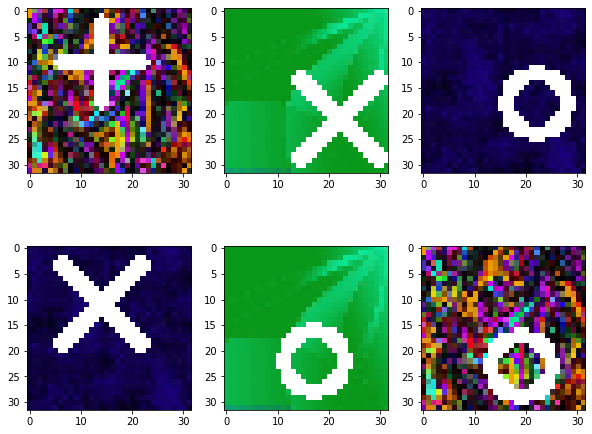

In [ ]:
# generate and preview dataset
X, y = generate_shapes_with_background_dataset(backgroud_images)
print(X.shape)
print(y.shape)

# preview some examples
fig, axs = plt.subplots(2,3)
axs[0][0].imshow(X[0], cmap='gray')
axs[0][1].imshow(X[1], cmap='gray')
axs[0][2].imshow(X[2], cmap='gray')
axs[1][0].imshow(X[246], cmap='gray')
axs[1][1].imshow(X[623], cmap='gray')
axs[1][2].imshow(X[125], cmap='gray')

print(y[0])
print(y[1])
print(y[2])

## **Task 5:**

To perform classification and localization task it is necessary to create a dataset with shapes in random positions and save the coordinates of Bounding Boxes. The task is to create a set of functions, that will be able to generate images with different backgrounds and place shapes and/or images in random positions, as well as save the information of the smallest BoundingBox, that outlines the shape.

In [ ]:
def generate_shapes_with_background_boundingbox_dataset(backgrounds):
  import random
  from sklearn.utils import shuffle

  resized_backgrounds = []
  for bg in backgrounds:
    resized_backgrounds.append(cv2.resize(bg, (32,32))) 

  X = []
  y = []
  bb = []

  # generate set of circles
  for w in range(7,25):
    for h in range(7,25):
      X.append(generate_circle(resized_backgrounds[random.randrange(0,3)].copy(), w, h))
      y.append(0)
      bb.append(((-8+w,-8+h),(8+w,8+h)))

  # generate set of crossbars
  for w in range(0,17):
    for h in range(0,17):
      X.append(generate_cross(resized_backgrounds[random.randrange(0,3)].copy(), (0+w,8+h), (16+w,8+h), (8+w,0+h), (8+w,16+h)))
      y.append(1)
      bb.append(((-1+w,-1+h),(17+w,17+h)))

  # generate set of crosses
  for w in range(0,17):
    for h in range(0,17):
      X.append(generate_cross(resized_backgrounds[random.randrange(0,3)].copy(), (0+w,0+h), (16+w,16+h), (0+w,16+h), (16+w,0+h)))
      y.append(2)
      bb.append(((-1+w,-1+h),(17+w,17+h)))

  X_shuffled, y_shuffled, bb_shuffled = shuffle(X, y, bb)
  # stack - join list of arrays along a new axis
  X = np.stack(X_shuffled)
  y = np.stack(y_shuffled)
  bb = bb_shuffled

  data = (X, y, bb)
  return data

In [ ]:
# prepare background images
!wget --no-check-certificate \
    https://c4.wallpaperflare.com/wallpaper/1021/131/727/colors-texture-pattern-artwork-wallpaper-preview.jpg \
    -O colors_artwork_background.jpg

!wget --no-check-certificate \
    https://ia902807.us.archive.org/33/items/background-cover-buku-warna-hijau-12/__ia_thumb.jpg \
    -O green.jpg

!wget --no-check-certificate \
    https://www.commentnation.com/hotlinks/red_on_black_matte_pattern.jpg \
    -O dark.jpg

background_image1 = cv2.imread('colors_artwork_background.jpg')
background_image2 = cv2.imread('green.jpg')
background_image3 = cv2.imread('dark.jpg')

backgroud_images = (background_image1, background_image2, background_image3)

--2021-10-25 21:09:06--  https://c4.wallpaperflare.com/wallpaper/1021/131/727/colors-texture-pattern-artwork-wallpaper-preview.jpg
Resolving c4.wallpaperflare.com (c4.wallpaperflare.com)... 172.67.129.81, 104.21.2.147, 2606:4700:3033::6815:293, ...
Connecting to c4.wallpaperflare.com (c4.wallpaperflare.com)|172.67.129.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134293 (131K) [image/jpeg]
Saving to: ‘colors_artwork_background.jpg’

colors_artwork_back 100%[===================>] 131.15K  --.-KB/s    in 0.07s   

2021-10-25 21:09:07 (1.91 MB/s) - ‘colors_artwork_background.jpg’ saved [134293/134293]

--2021-10-25 21:09:07--  https://ia902807.us.archive.org/33/items/background-cover-buku-warna-hijau-12/__ia_thumb.jpg
Resolving ia902807.us.archive.org (ia902807.us.archive.org)... 207.241.232.107
Connecting to ia902807.us.archive.org (ia902807.us.archive.org)|207.241.232.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5221 (5.1K)

(902, 32, 32, 3)
(902,)
902


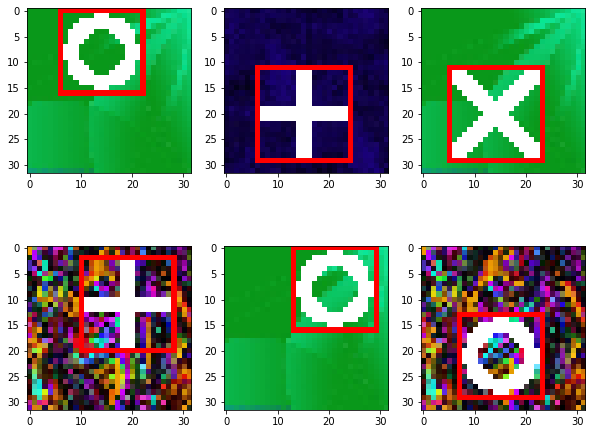

In [ ]:
# generate and preview dataset
X, y, bb = generate_shapes_with_background_boundingbox_dataset(backgroud_images)
print(X.shape)
print(y.shape)
print(len(bb))


# preview some examples
fig, axs = plt.subplots(2,3)

cv2.rectangle(X[0],bb[0][0],bb[0][1],(255,0,0),1)
axs[0][0].imshow(X[0], cmap='gray')

cv2.rectangle(X[1],bb[1][0],bb[1][1],(255,0,0),1)
axs[0][1].imshow(X[1], cmap='gray')

cv2.rectangle(X[2],bb[2][0],bb[2][1],(255,0,0),1)
axs[0][2].imshow(X[2], cmap='gray')

cv2.rectangle(X[153],bb[153][0],bb[153][1],(255,0,0),1)
axs[1][0].imshow(X[153], cmap='gray')

cv2.rectangle(X[732],bb[732][0],bb[732][1],(255,0,0),1)
axs[1][1].imshow(X[732], cmap='gray')

cv2.rectangle(X[351],bb[351][0],bb[351][1],(255,0,0),1)
axs[1][2].imshow(X[351], cmap='gray')